In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.utils import resample
import joblib

In [3]:
df = pd.read_csv('../creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# Downsampling

legit = df[df.Class == 0]
fraud = df[df.Class == 1]

In [6]:
legit_sample = resample(legit,replace=False,n_samples=len(fraud),random_state=42)
df1 = pd.concat([legit_sample, fraud], axis=0)

In [7]:
df1['Class'].value_counts()


Class
0    492
1    492
Name: count, dtype: int64

In [8]:
x = df1.drop(columns='Class', axis=1)
y = df1['Class']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=5)
(x_train.shape, y_train.shape),(x_test.shape, y_test.shape)

(((738, 30), (738,)), ((246, 30), (246,)))

In [10]:
model = GaussianNB()

In [11]:
model.fit(x_train, y_train)

GaussianNB()

In [12]:
filename = 'naive_bayes_downsampling_model.joblib'
joblib.dump(model, filename)

['naive_bayes_downsampling_model.joblib']

In [13]:
y_train_pred=model.predict(x_train)
training_data_accuracy = accuracy_score(y_train_pred, y_train)

In [14]:
print('Accuracy on Training data :', training_data_accuracy)

Accuracy on Training data : 0.8617886178861789


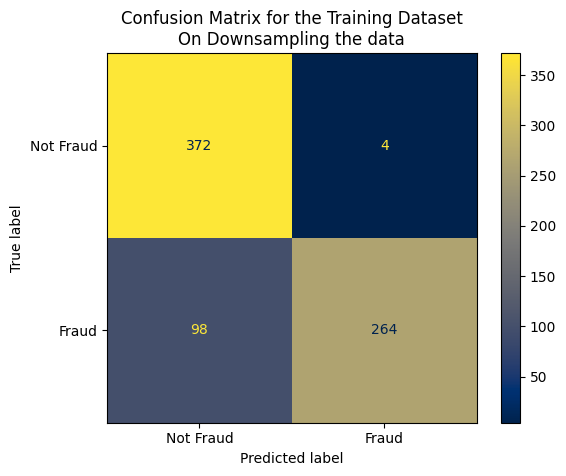

In [15]:
cm = confusion_matrix(y_train, y_train_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Not Fraud', 'Fraud'])
disp.plot(cmap='cividis')
plt.title('Confusion Matrix for the Training Dataset\nOn Downsampling the data')
plt.show();

In [16]:
y_test_pred = model.predict(x_test)
pd.value_counts(y_test_pred)

0    151
1     95
Name: count, dtype: int64

In [17]:
testing_data_accuracy = accuracy_score(y_test_pred, y_test)
print('Accuracy score on Test Data :', testing_data_accuracy)

Accuracy score on Test Data : 0.8577235772357723


In [18]:
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.77      1.00      0.87       116
           1       1.00      0.73      0.84       130

    accuracy                           0.86       246
   macro avg       0.88      0.87      0.86       246
weighted avg       0.89      0.86      0.86       246



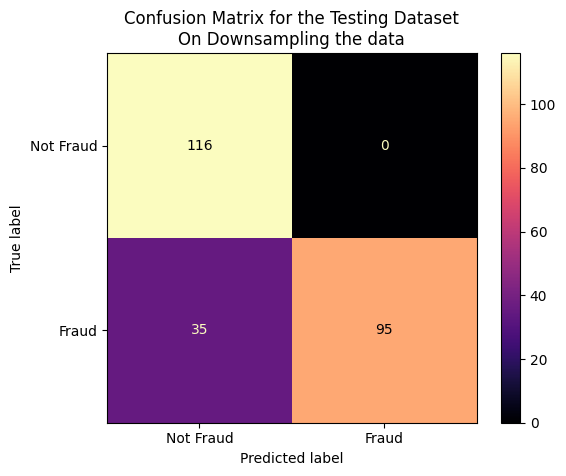

In [19]:
cm = confusion_matrix(y_test, y_test_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Not Fraud', 'Fraud'])
disp.plot(cmap='magma')
plt.title('Confusion Matrix for the Testing Dataset\nOn Downsampling the data')
plt.show();

In [20]:
# Upsampling
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0]

fraud = resample(fraud, replace=True, n_samples=len(non_fraud), random_state=42)

In [21]:
df2=pd.concat([fraud,non_fraud])
x = df2.drop(['Time', 'Class'], axis=1)  
y = df2['Class']

In [22]:
print(len(x))
print(len(y))

568630
568630


In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [24]:
model = GaussianNB()

In [25]:
model.fit(x_train, y_train)

GaussianNB()

In [26]:
filename = 'naive_bayes_upsampling_model.joblib'
joblib.dump(model, filename)

['naive_bayes_upsampling_model.joblib']

In [27]:
y_train_pred=model.predict(x_train)

In [28]:
print("Accuracy on Training Data : ",accuracy_score(y_train,y_train_pred))
print("\nClassification Report :\n", classification_report(y_train, y_train_pred))


Accuracy on Training Data :  0.9166417529852452

Classification Report :
               precision    recall  f1-score   support

           0       0.87      0.97      0.92    227335
           1       0.97      0.86      0.91    227569

    accuracy                           0.92    454904
   macro avg       0.92      0.92      0.92    454904
weighted avg       0.92      0.92      0.92    454904



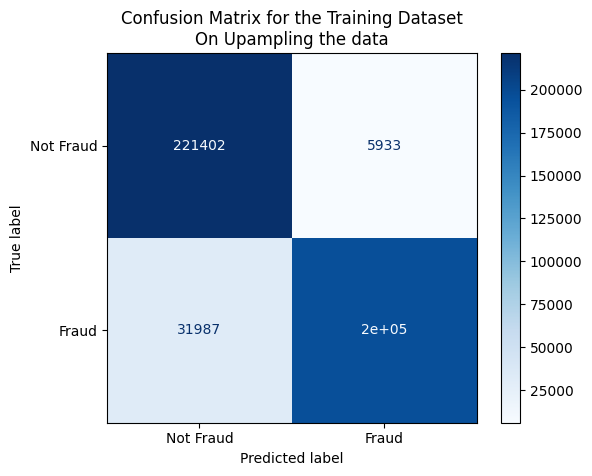

In [29]:
cm = confusion_matrix(y_train, y_train_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Not Fraud', 'Fraud'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for the Training Dataset\nOn Upampling the data')
plt.show();

In [30]:
y_test_pred=model.predict(x_test)

In [31]:
print("Accuracy on Testing Data : ",accuracy_score(y_test,y_test_pred))
print("\nClassification Report :\n", classification_report(y_test, y_test_pred))

Accuracy on Testing Data :  0.9188663981851116

Classification Report :
               precision    recall  f1-score   support

           0       0.88      0.98      0.92     56980
           1       0.97      0.86      0.91     56746

    accuracy                           0.92    113726
   macro avg       0.92      0.92      0.92    113726
weighted avg       0.92      0.92      0.92    113726



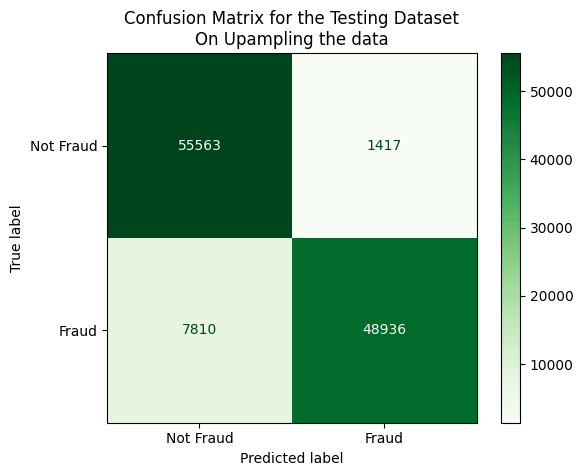

In [32]:
cm = confusion_matrix(y_test, y_test_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Not Fraud', 'Fraud'])
disp.plot(cmap='Greens')
plt.title('Confusion Matrix for the Testing Dataset\nOn Upampling the data')
plt.show();